In [1]:
import basedosdados as bd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = bd.read_table(dataset_id='world_fifa_worldcup',
table_id='matches',
billing_project_id="dados-bd-359914")

Downloading: 100%|████████████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 935.59rows/s]


In [4]:
df_croatia = df[((df['team_a_name'] == 'Croatia')|(df['team_b_name'] == 'Croatia')) ]

In [5]:
df_argentina = df[((df['team_a_name'] == 'Argentina')|(df['team_b_name'] == 'Argentina')) ]

In [6]:
X = [1,2,3,4,5,6,7,8,9,10]

In [7]:
Y =  [1,2,3,4,5,6,7,8,9,10]

### jogos Croácia dois tempos

In [8]:
df_dtb = df_croatia[df_croatia['extra_time']==0]

In [9]:
df_dtb[['team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
528,Jamaica,1–3,Croatia,0,0,0-0
540,Japan,0–1,Croatia,0,0,0-0
560,Argentina,1–0,Croatia,0,0,0-0
570,Romania,0–1,Croatia,0,0,0-0
575,Germany,0–3,Croatia,0,0,0-0
577,France,2–1,Croatia,0,0,0-0
578,Netherlands,1–2,Croatia,0,0,0-0
588,Croatia,0–1,Mexico,0,0,0-0
604,Italy,1–2,Croatia,0,0,0-0
622,Ecuador,1–0,Croatia,0,0,0-0


In [10]:
# Para a Croácia
def lab(df_dtb):
    if ((df_dtb['team_a_name'] == 'Croatia') & (df_dtb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_dtb['team_b_name'] == 'Croatia') & (df_dtb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_dtb['team_a_name'] == 'Croatia') & (df_dtb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_dtb['team_b_name'] == 'Croatia') & (df_dtb['team_a_win'] == 1)):
        return "derrota"
    elif  (df_dtb['draw'] == 1):
        return "empate"

df_dtb["jogos"] = df_dtb.apply(lambda df_dtb:lab(df_dtb),axis = 1)

In [11]:
df_dtb["jogos"].value_counts()

vitória    10
derrota     8
empate      2
Name: jogos, dtype: int64

In [12]:
X[0] = ((sum(df_dtb["jogos"] == 'vitória') / df_dtb["jogos"].value_counts().sum()) * 100).round(2) 
X[1] = ((sum(df_dtb["jogos"] == 'derrota') / df_dtb["jogos"].value_counts().sum()) * 100).round(2)
X[2] = ((sum(df_dtb["jogos"] == 'empate') / df_dtb["jogos"].value_counts().sum()) * 100).round(2)

### jogos Argentina dois tempo

In [13]:
df_dta = df_argentina[(df_argentina['extra_time']==0)]

In [14]:
df_dta[['team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
4,Argentina,1–0,France,0,0,0-0
10,Argentina,6–3,Mexico,0,0,0-0
14,Argentina,3–1,Chile,0,0,0-0
15,Argentina,6–1,United States,0,0,0-0
17,Uruguay,4–2,Argentina,0,0,0-0
...,...,...,...,...,...,...
830,Argentina,1–0,Belgium,0,0,0-0
841,Argentina,1–1,Iceland,0,0,0-0
858,Argentina,0–3,Croatia,0,0,0-0
875,Nigeria,1–2,Argentina,0,0,0-0


In [15]:
def lab(df_dta):
    if ((df_dta['team_a_name'] == 'Argentina') & (df_dta['team_a_win'] == 1)):
        return "vitória"
    elif ((df_dta['team_b_name'] == 'Argentina') & (df_dta['team_b_win'] == 1)):
        return "vitória"
    elif ((df_dta['team_a_name'] == 'Argentina') & (df_dta['team_b_win'] == 1)):
        return "derrota"
    elif ((df_dta['team_b_name'] == 'Argentina') & (df_dta['team_a_win'] == 1)):
        return "derrota"
    elif  (df_dta['draw'] == 1):
        return "empate"

df_dta["jogos"] = df_dta.apply(lambda df_dta:lab(df_dta),axis = 1)

In [16]:
df_dta["jogos"].value_counts()

vitória    40
derrota    22
empate     10
Name: jogos, dtype: int64

In [17]:
Y[0] = ((sum(df_dta["jogos"] == 'vitória') / df_dta["jogos"].value_counts().sum()) * 100).round(2) 
Y[1] = ((sum(df_dta["jogos"] == 'derrota') / df_dta["jogos"].value_counts().sum()) * 100).round(2)
Y[2] = ((sum(df_dta["jogos"] == 'empate') / df_dta["jogos"].value_counts().sum()) * 100).round(2)

### jogo Croácia prorrogação 

In [18]:
df_ppb = df_croatia[(df_croatia['extra_time']==1)&(df_croatia['penalty_shootout']==0)]

In [19]:
df_ppb[['year','replayed','stage_name','match_id','team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,year,replayed,stage_name,match_id,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
897,2018,0,semi-finals,M-2018-62,Croatia,2–1,England,1,0,0-0


In [20]:
def lab(df_ppb):   
    if ((df_ppb['team_a_name'] == 'Croatia') & (df_ppb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_ppb['team_b_name'] == 'Croatia') & (df_ppb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_ppb['team_a_name'] == 'Croatia') & (df_ppb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_ppb['team_b_name'] == 'Croatia') & (df_ppb['team_a_win'] == 1)):
        return "derrota"

    
df_ppb["jogos"] = df_ppb.apply(lambda df_ppb:lab(df_ppb),axis = 1)

In [21]:
df_ppb["jogos"].value_counts()

vitória    1
Name: jogos, dtype: int64

In [22]:
X[3] = ((sum(df_ppb["jogos"] == 'vitória') / df_ppb["jogos"].value_counts().sum()) * 100).round(2) 
X[4] = ((sum(df_ppb["jogos"] == 'derrota') / df_ppb["jogos"].value_counts().sum()) * 100).round(2)


### jogos Argentina prorrogação

In [23]:
df_ppa = df_argentina[(df_argentina['extra_time']==1)&(df_argentina['penalty_shootout']==0)]

In [24]:
df_ppa[['year','team_a_score','team_b_score','team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties','draw']]

,year,team_a_score,team_b_score,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties,draw
307,1978,3,1,Argentina,3–1,Netherlands,1,0,0-0,0
693,2006,2,1,Argentina,2–1,Mexico,1,0,0-0,0
826,2014,1,0,Argentina,1–0,Switzerland,1,0,0-0,0
835,2014,1,0,Germany,1–0,Argentina,1,0,0-0,0


In [25]:
def lab(df_ppa):   
    if ((df_ppa['team_a_name'] == 'Argentina') & (df_ppa['team_a_win'] == 1)):
        return "vitória"
    elif ((df_ppa['team_b_name'] == 'Argentina') & (df_ppa['team_b_win'] == 1)):
        return "vitória"
    elif ((df_ppa['team_a_name'] == 'Argentina') & (df_ppa['team_b_win'] == 1)):
        return "derrota"
    elif ((df_ppa['team_b_name'] == 'Argentina') & (df_ppa['team_a_win'] == 1)):
        return "derrota"


df_ppa["jogos"] = df_ppa.apply(lambda df_ppa:lab(df_ppa),axis = 1)    

In [26]:
df_ppa["jogos"].value_counts()

vitória    3
derrota    1
Name: jogos, dtype: int64

In [27]:
Y[3] = ((sum(df_ppa["jogos"] == 'vitória') / df_ppa["jogos"].value_counts().sum()) * 100).round(2) 
Y[4] = ((sum(df_ppa["jogos"] == 'derrota') / df_ppa["jogos"].value_counts().sum()) * 100).round(2)


### pênaltis Croácia

In [28]:
df_pb = df_croatia[df_croatia['penalty_shootout']==1]

In [29]:
df_pb[['team_a_name','score','team_b_name','extra_time','score_penalties','team_a_win','team_b_win']]

,team_a_name,score,team_b_name,extra_time,score_penalties,team_a_win,team_b_win
887,Croatia,1–1,Denmark,1,3–2,1,0
895,Russia,2–2,Croatia,1,3–4,0,1


In [30]:
def lab(df_pb):
    if ((df_pb['team_a_name'] == 'Croatia') & (df_pb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_pb['team_b_name'] == 'Croatia') & (df_pb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_pb['team_a_name'] == 'Croatia') & (df_pb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_pb['team_b_name'] == 'Croatia') & (df_pb['team_a_win'] == 1)):
        return "derrota"

df_pb["jogos"] = df_pb.apply(lambda df_pb:lab(df_pb),axis = 1)

In [31]:
df_pb["jogos"].value_counts()

vitória    2
Name: jogos, dtype: int64

In [32]:
X[5] = ((sum(df_pb["jogos"] == 'vitória') / df_pb["jogos"].value_counts().sum()) * 100).round(2) 
X[6] = ((sum(df_pb["jogos"] == 'derrota') / df_pb["jogos"].value_counts().sum()) * 100).round(2)

### pênaltis Argentina

In [33]:
df_pa = df_argentina[df_argentina['penalty_shootout']==1]

In [34]:
df_pa[['team_a_name','score','team_b_name','extra_time','score_penalties']]

,team_a_name,score,team_b_name,extra_time,score_penalties
456,Argentina,0–0,Yugoslavia,1,3–2
460,Argentina,1–1,Italy,1,4–3
571,Argentina,2–2,England,1,4–3
700,Germany,1–1,Argentina,1,4–2
833,Netherlands,0–0,Argentina,1,2–4


In [35]:
def lab(df_pa):
    if ((df_pa['team_a_name'] == 'Argentina') & (df_pa['team_a_win'] == 1)):
        return "vitória"
    elif ((df_pa['team_b_name'] == 'Argentina') & (df_pa['team_b_win'] == 1)):
        return "vitória"
    elif ((df_pa['team_a_name'] == 'Argentina') & (df_pa['team_b_win'] == 1)):
        return "derrota"
    elif ((df_pa['team_b_name'] == 'Argentina') & (df_pa['team_a_win'] == 1)):
        return "derrota"

df_pa["jogos"] = df_pa.apply(lambda df_pa:lab(df_pa),axis = 1)

In [36]:
df_pa["jogos"].value_counts()

vitória    4
derrota    1
Name: jogos, dtype: int64

In [37]:
Y[5] = ((sum(df_pa["jogos"] == 'vitória') / df_pa["jogos"].value_counts().sum()) * 100).round(2)
Y[6] = ((sum(df_pa["jogos"] == 'derrota') / df_pa["jogos"].value_counts().sum()) * 100).round(2)

### total Croácia


In [38]:
df_3 = df_croatia

In [39]:
# Total Croácia
def lab(df_3):
    if ((df_3['team_a_name'] == 'Croatia') & (df_3['team_a_win'] == 1)):
        return "vitória"
    elif ((df_3['team_b_name'] == 'Croatia') & (df_3['team_b_win'] == 1)):
        return "vitória"
    elif ((df_3['team_a_name'] == 'Croatia') & (df_3['team_b_win'] == 1)):
        return "derrota"
    elif ((df_3['team_b_name'] == 'Croatia') & (df_3['team_a_win'] == 1)):
        return "derrota"
    elif  (df_3['draw'] == 1):
        return "empate"

df_3["jogos"] = df_3.apply(lambda df_3:lab(df_3),axis = 1)

In [40]:
df_3["jogos"].value_counts()

vitória    13
derrota     8
empate      2
Name: jogos, dtype: int64

In [41]:
X[7] = ((sum(df_3["jogos"] == 'vitória') / df_3["jogos"].value_counts().sum()) * 100).round(2) 
X[8] = ((sum(df_3["jogos"] == 'derrota') / df_3["jogos"].value_counts().sum()) * 100).round(2)
X[9] = ((sum(df_3["jogos"] == 'empate') / df_3["jogos"].value_counts().sum()) * 100).round(2)

### total Argentina

In [42]:
df_2 = df_argentina

In [43]:
def lab(df_2):
    if ((df_2['team_a_name'] == 'Argentina') & (df_2['team_a_win'] == 1)):
        return "vitória"
    elif ((df_2['team_b_name'] == 'Argentina') & (df_2['team_b_win'] == 1)):
        return "vitória"
    elif ((df_2['team_a_name'] == 'Argentina') & (df_2['team_b_win'] == 1)):
        return "derrota"
    elif ((df_2['team_b_name'] == 'Argentina') & (df_2['team_a_win'] == 1)):
        return "derrota"
    elif  (df_2['draw'] == 1):
        return "empate"

df_2["jogos"] = df_2.apply(lambda df_3:lab(df_3),axis = 1)

In [44]:
df_2["jogos"].value_counts()

vitória    47
derrota    24
empate     10
Name: jogos, dtype: int64

In [45]:
Y[7] = ((sum(df_2["jogos"] == 'vitória') / df_2["jogos"].value_counts().sum()) * 100).round(2)
Y[8] = ((sum(df_2["jogos"] == 'derrota') / df_2["jogos"].value_counts().sum()) * 100).round(2)
Y[9] = ((sum(df_2["jogos"] == 'empate') / df_2["jogos"].value_counts().sum()) * 100).round(2)

In [46]:
Z = ['Vitória (dois tempos)','Derrota (dois tempos)', 'Empate (dois tempos)','Vitória (prorrogação)','Derrota (prorrogação)','Vitória (pênaltis)', 'Derrota (pênaltis)', 'Vitória', 'Derrota','Empate']

In [47]:
data_1 = {'index' : Z, 'croacia': X, 'argentina': Y}

In [48]:
df = pd.DataFrame(data_1)

In [49]:
df = df.set_index('index')

In [50]:
df

,croacia,argentina
index,,
Vitória (dois tempos),50.00,55.56
Derrota (dois tempos),40.00,30.56
Empate (dois tempos),10.00,13.89
Vitória (prorrogação),100.00,75.00
Derrota (prorrogação),0.00,25.00
Vitória (pênaltis),100.00,80.00
Derrota (pênaltis),0.00,20.00
Vitória,56.52,58.02
Derrota,34.78,29.63


In [51]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df.index
column0 = df['argentina']
column1 = df['croacia']
title0 = 'Argentina'
title1 = 'Croácia'

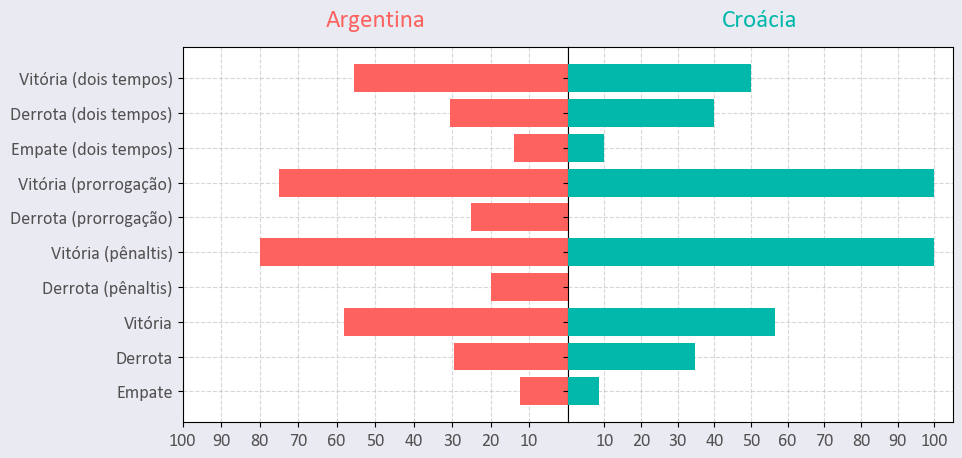

In [52]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)


axes[0].invert_xaxis() 

plt.gca().invert_yaxis()

axes[0].set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90,100])
axes[1].set_xticks([10, 20, 30, 40, 50, 60, 70, 80,90,100])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
axes[0].grid(linestyle='--', alpha=0.5)
axes[1].grid(linestyle='--', alpha=0.5)
plt.savefig("desempenho_p.svg", dpi = 600)
plt.show()  
    